### Task Description

In [1]:
import random
import math
import matplotlib.pyplot as plt
%matplotlib inline

## Variables

In [2]:
# constants
n = 500
price_for_item = 12 # $

work_price_first_machine = 5 # $
work_price_second_machine = 2 # $
work_price_third_machine = 3 # $

decline_first_machine = 10 # %
decline_second_machine = 20 # %
decline_third_machine = 10 # %

arrival_rate = 35 # min
first_machine_speed = 30 # min
second_machine_speed = 50 # min
third_machine_speed = 40 # min

first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

# simulation variables
x = list(range(n))
current_time = 0
first_machine_time = 0
second_machine_time = 0

# collections of elements
customers_time_copy = []
customers_status_copy = []

customers_time = [] # arrive times distributed exponentially will be stored here
customers_status = [] # str variable for each

### Arrival times generation

In [3]:
def get_random_arrival_time():
    return round(random.expovariate(1.0/arrival_rate))

In [4]:
def get_service_time_value(service_rate):
    return round(random.expovariate(1.0 / service_rate))

Array of times between arrivals:
[21, 60, 11, 37, 13, 41, 3, 28, 10, 18, 81, 3, 24, 3, 12, 16, 18, 103, 40, 23, 31, 44, 39, 35, 65, 64, 17, 67, 4, 67, 14, 41, 30, 4, 27, 19, 6, 11, 53, 158, 40, 13, 34, 107, 57, 25, 21, 75, 36, 9, 5, 42, 1, 17, 24, 26, 19, 5, 6, 22, 34, 85, 15, 0, 17, 0, 48, 36, 25, 0, 31, 2, 35, 32, 13, 93, 55, 94, 8, 10, 77, 38, 16, 3, 37, 42, 14, 34, 8, 9, 89, 44, 7, 22, 217, 7, 2, 5, 56, 21, 8, 42, 5, 22, 26, 1, 47, 38, 60, 113, 16, 20, 56, 21, 38, 6, 33, 3, 45, 14, 48, 55, 36, 2, 70, 39, 50, 67, 46, 34, 2, 0, 44, 137, 49, 19, 155, 6, 104, 55, 47, 52, 66, 20, 75, 33, 44, 37, 12, 3, 20, 9, 39, 32, 0, 61, 5, 21, 31, 8, 64, 86, 15, 70, 32, 45, 13, 43, 135, 6, 84, 46, 37, 2, 8, 28, 43, 40, 12, 1, 32, 27, 24, 42, 45, 114, 40, 104, 5, 20, 36, 7, 28, 3, 5, 1, 0, 145, 119, 12, 50, 6, 32, 42, 55, 14, 2, 17, 0, 10, 11, 41, 9, 18, 137, 18, 13, 116, 34, 16, 38, 6, 13, 5, 19, 1, 41, 20, 4, 26, 5, 141, 6, 41, 19, 4, 24, 14, 17, 67, 46, 3, 38, 27, 1, 3, 86, 17, 51, 69, 2, 26, 39, 

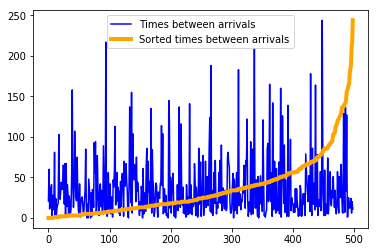

In [5]:
customers_time = []

def through_time_generation():
    curr_time = 0
    waiting_time = 0

    for i in x:
        waiting_time = get_random_arrival_time()
        customers_time.append(curr_time + waiting_time)
        curr_time += waiting_time

## this works incorrectly
## because sometimes time is going in other direction
def through_const_generation():
    value = 0
    
    for i in x:
        value = get_random_arrival_time()
        customers_time.append(i * arrival_rate + value)

## HERE I'M CALLING FUNCTION
## THAT IS WORKING IN THIS WAY:
## every iteration generating exp-distributed value with rate=35 (lambda = 1/rate)
## and curr_time_{i} has sum of all generated waiting_times (on previous row) till i-th iteration 

through_time_generation()
#through_const_generation()

between_arrival_times = []
for i in range(1, n):
    between_arrival_times.append(customers_time[i] - customers_time[i-1])

print('Array of times between arrivals:')
print(between_arrival_times)
print('\n\nE(x) of times between arrivals')
print(sum(between_arrival_times)/n)
    
fig, ax = plt.subplots()
ax.plot(range(n - 1), between_arrival_times, label = 'Times between arrivals', color='blue')

sorted_between_arrival_times = sorted(between_arrival_times)

ax.plot(range(n - 1), sorted_between_arrival_times, label = 'Sorted times between arrivals', linewidth= 4, color='orange')
ax.legend()
plt.show()

## Setup for other variables states

In [6]:
for i in x:
    customers_status.append('arrive')

## setting all initial times to status 'arrive'

## Functions Implementation

In [7]:
# choose machine
def number_of_machine_to_work_on():
    rnd = random.random()
    if (rnd < 0.5):
        print('goes to machine #1 in experiment')
        return 1
    else:
        print('goes to machine #2 in experiment')
        return 2

In [8]:
# returns true if machine doesn't decline item
def work_with_item(percentage_for_decline):
    r = random.random()
    
    if (r < percentage_for_decline / 100):
        return 0
    return 1

In [9]:
def first_machine():
    global current_time
    global first_success_amount
    global first_reject_amount
    global first_machine_time
    
    print('current_time = ', current_time)
    print('first_machine_time = ', first_machine_time)

    if (work_with_item(decline_first_machine)):
        first_success_amount += 1
        
        if (first_machine_time <= current_time):
            # work is done for this item
            first_machine_time = current_time + get_service_time_value(first_machine_speed)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            first_machine_time += get_service_time_value(first_machine_speed)
            customers_time.append(first_machine_time)
            customers_status.append('finished')
    else:
        first_reject_amount += 1
        customers_time.append(first_machine_time)
        customers_status.append('repeat')

In [10]:
def second_machine(isRepeating):
    global current_time
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global garbage_amount
    
    print('current_time = ', current_time)
    print('second_machine_time = ', second_machine_time)
    
    if (work_with_item(decline_second_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(second_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(second_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

In [11]:
def third_machine(isRepeating):
    global current_time
    global second_success_amount
    global second_reject_amount
    global second_machine_time
    global garbage_amount
    
    print('current_time = ', current_time)
    print('second_machine_time = ', second_machine_time)
    
    if (work_with_item(decline_third_machine)):
        second_success_amount += 1
        
        if (second_machine_time <= current_time):
            # work is done for this item
            second_machine_time = current_time + get_service_time_value(third_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
        else:
            # work is done after current-working-item finished working
            second_machine_time += get_service_time_value(third_machine_speed)
            customers_time.append(second_machine_time)
            customers_status.append('finished')
    else:
        if (isRepeating == 1):
            customers_time.append(second_machine_time)
            customers_status.append('garbage')
            return
        
        second_reject_amount += 1
        customers_time.append(second_machine_time)
        customers_status.append('repeat')

## Simulation with machine №2

In [12]:
i = 0 # current arrival that is supported

customers_time_copy = customers_time.copy()
customers_status_copy = customers_status.copy()

while (i < len(customers_time)):
    print('Item # ', i)
    
    if (i < n):
        current_time = customers_time[i]
    
    # we have to synchronize 2-nd machine and current time
    if (i == n):
        print('amount of works done on 2nd machine before repeating:', second_success_amount + second_reject_amount)
        print('first_machine_time = ', first_machine_time)
        print('second_machine_time = ', second_machine_time)
        print('current_time = ', current_time)
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        print('arrive')
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            second_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        print('repeat')
        second_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        print('garbage')
        garbage_amount += 1
        
    i += 1

Item #  0
arrive
goes to machine #2 in experiment
current_time =  10
second_machine_time =  0
Item #  1
arrive
goes to machine #2 in experiment
current_time =  31
second_machine_time =  0
Item #  2
arrive
goes to machine #1 in experiment
current_time =  91
first_machine_time =  0
Item #  3
arrive
goes to machine #1 in experiment
current_time =  102
first_machine_time =  99
Item #  4
arrive
goes to machine #2 in experiment
current_time =  139
second_machine_time =  74
Item #  5
arrive
goes to machine #2 in experiment
current_time =  152
second_machine_time =  156
Item #  6
arrive
goes to machine #2 in experiment
current_time =  193
second_machine_time =  284
Item #  7
arrive
goes to machine #1 in experiment
current_time =  196
first_machine_time =  108
Item #  8
arrive
goes to machine #1 in experiment
current_time =  224
first_machine_time =  243
Item #  9
arrive
goes to machine #2 in experiment
current_time =  234
second_machine_time =  284
Item #  10
arrive
goes to machine #1 in exper

arrive
goes to machine #1 in experiment
current_time =  11343
first_machine_time =  11373
Item #  324
arrive
goes to machine #1 in experiment
current_time =  11414
first_machine_time =  11384
Item #  325
arrive
goes to machine #1 in experiment
current_time =  11478
first_machine_time =  11457
Item #  326
arrive
goes to machine #1 in experiment
current_time =  11600
first_machine_time =  11510
Item #  327
arrive
goes to machine #2 in experiment
current_time =  11624
second_machine_time =  11231
Item #  328
arrive
goes to machine #1 in experiment
current_time =  11626
first_machine_time =  11616
Item #  329
arrive
goes to machine #2 in experiment
current_time =  11636
second_machine_time =  11643
Item #  330
arrive
goes to machine #2 in experiment
current_time =  11656
second_machine_time =  11658
Item #  331
arrive
goes to machine #1 in experiment
current_time =  11664
first_machine_time =  11687
Item #  332
arrive
goes to machine #1 in experiment
current_time =  11758
first_machine_tim

finished
Item #  818
finished
Item #  819
finished
Item #  820
repeat
current_time =  17928
second_machine_time =  20183
Item #  821
finished
Item #  822
repeat
current_time =  17928
second_machine_time =  20265
Item #  823
finished
Item #  824
finished
Item #  825
finished
Item #  826
finished
Item #  827
finished
Item #  828
finished
Item #  829
finished
Item #  830
finished
Item #  831
finished
Item #  832
finished
Item #  833
finished
Item #  834
finished
Item #  835
finished
Item #  836
finished
Item #  837
finished
Item #  838
finished
Item #  839
finished
Item #  840
finished
Item #  841
finished
Item #  842
finished
Item #  843
finished
Item #  844
finished
Item #  845
finished
Item #  846
finished
Item #  847
finished
Item #  848
finished
Item #  849
finished
Item #  850
finished
Item #  851
finished
Item #  852
finished
Item #  853
finished
Item #  854
finished
Item #  855
finished
Item #  856
finished
Item #  857
repeat
current_time =  17928
second_machine_time =  20265
Item

## Results

In [13]:
current_time = second_machine_time

print('Rejects: first [', first_reject_amount, '], second [', second_reject_amount, ']')
print('Successes: first [', first_success_amount, '], second [', second_success_amount, ']')
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

print('Time spent: ', current_time, 'seconds')

money_earned = price_for_item * (finished_amount)

money_spent = work_price_first_machine * (first_success_amount + first_reject_amount)
money_spent += work_price_second_machine * (second_success_amount + second_reject_amount)

profit = money_earned - money_spent

print('Money earned: ', money_earned, '$')
print('Money spent: ', money_spent, '$')

print('Profit money: ', profit, '$')
print('Profit($)\sec:', profit / current_time)

Rejects: first [ 30 ], second [ 47 ]
Successes: first [ 233 ], second [ 256 ]
Garbage items:  11
Finishes:  489
Repeats:  77
Time spent:  21626 seconds
Money earned:  5868 $
Money spent:  1921 $
Profit money:  3947 $
Profit($)\sec: 0.18251179136224915


## Simulation with machine №3

In [14]:
first_reject_amount = 0
first_success_amount = 0
second_reject_amount = 0
second_success_amount = 0

second_machine_time = 0
first_machine_time = 0

garbage_amount = 0
finished_amount = 0
repeat_amount = 0

current_time = 0

i = 0 # current arrival that is supported

customers_time = customers_time_copy
customers_status = customers_status_copy

while (i < len(customers_time)):
    print('Item # ', i)
        
    if (i < n):
        current_time = customers_time[i]
    
    # we have to synchronize 2-nd machine and current time
    if (i == n):
        print('amount of works done on 2nd machine before repeating:', second_success_amount + second_reject_amount)
        print('first_machine_time = ', first_machine_time)
        print('second_machine_time = ', second_machine_time)
        print('current_time = ', current_time)
    
    # ARRIVALS
    if (customers_status[i] == 'arrive'):
        print('arrive')
        machine_number = number_of_machine_to_work_on()
        if (machine_number == 1):
            first_machine()
        if (machine_number == 2):
            third_machine(0)
    
    # FINISHED
    if (customers_status[i] == 'finished'):
        print('finished')
        finished_amount += 1
        
    # REPEAT
    if (customers_status[i] == 'repeat'):
        print('repeat')
        third_machine(1)
        repeat_amount += 1
    
    # GARBAGE
    if (customers_status[i] == 'garbage'):
        print('garbage')
        garbage_amount += 1
        
    i += 1

Item #  0
arrive
goes to machine #2 in experiment
current_time =  10
second_machine_time =  0
Item #  1
arrive
goes to machine #2 in experiment
current_time =  31
second_machine_time =  43
Item #  2
arrive
goes to machine #1 in experiment
current_time =  91
first_machine_time =  0
Item #  3
arrive
goes to machine #1 in experiment
current_time =  102
first_machine_time =  125
Item #  4
arrive
goes to machine #2 in experiment
current_time =  139
second_machine_time =  52
Item #  5
arrive
goes to machine #2 in experiment
current_time =  152
second_machine_time =  170
Item #  6
arrive
goes to machine #1 in experiment
current_time =  193
first_machine_time =  198
Item #  7
arrive
goes to machine #2 in experiment
current_time =  196
second_machine_time =  280
Item #  8
arrive
goes to machine #1 in experiment
current_time =  224
first_machine_time =  203
Item #  9
arrive
goes to machine #2 in experiment
current_time =  234
second_machine_time =  281
Item #  10
arrive
goes to machine #2 in exp

Item #  183
arrive
goes to machine #1 in experiment
current_time =  6476
first_machine_time =  6428
Item #  184
arrive
goes to machine #2 in experiment
current_time =  6518
second_machine_time =  6488
Item #  185
arrive
goes to machine #2 in experiment
current_time =  6563
second_machine_time =  6521
Item #  186
arrive
goes to machine #2 in experiment
current_time =  6677
second_machine_time =  6615
Item #  187
arrive
goes to machine #1 in experiment
current_time =  6717
first_machine_time =  6484
Item #  188
arrive
goes to machine #1 in experiment
current_time =  6821
first_machine_time =  6817
Item #  189
arrive
goes to machine #2 in experiment
current_time =  6826
second_machine_time =  6711
Item #  190
arrive
goes to machine #2 in experiment
current_time =  6846
second_machine_time =  6939
Item #  191
arrive
goes to machine #2 in experiment
current_time =  6882
second_machine_time =  6939
Item #  192
arrive
goes to machine #1 in experiment
current_time =  6889
first_machine_time = 

current_time =  10206
second_machine_time =  10286
Item #  294
arrive
goes to machine #2 in experiment
current_time =  10281
second_machine_time =  10323
Item #  295
arrive
goes to machine #2 in experiment
current_time =  10362
second_machine_time =  10354
Item #  296
arrive
goes to machine #2 in experiment
current_time =  10430
second_machine_time =  10381
Item #  297
arrive
goes to machine #1 in experiment
current_time =  10493
first_machine_time =  10206
Item #  298
arrive
goes to machine #2 in experiment
current_time =  10512
second_machine_time =  10431
Item #  299
arrive
goes to machine #1 in experiment
current_time =  10518
first_machine_time =  10506
Item #  300
arrive
goes to machine #1 in experiment
current_time =  10524
first_machine_time =  10537
Item #  301
arrive
goes to machine #2 in experiment
current_time =  10536
second_machine_time =  10525
Item #  302
arrive
goes to machine #2 in experiment
current_time =  10575
second_machine_time =  10525
Item #  303
arrive
goes t

Item #  538
finished
Item #  539
repeat
current_time =  17928
second_machine_time =  18130
Item #  540
finished
Item #  541
finished
Item #  542
repeat
current_time =  17928
second_machine_time =  18135
Item #  543
finished
Item #  544
finished
Item #  545
finished
Item #  546
finished
Item #  547
finished
Item #  548
finished
Item #  549
finished
Item #  550
finished
Item #  551
finished
Item #  552
finished
Item #  553
repeat
current_time =  17928
second_machine_time =  18135
Item #  554
finished
Item #  555
finished
Item #  556
finished
Item #  557
finished
Item #  558
finished
Item #  559
finished
Item #  560
finished
Item #  561
finished
Item #  562
finished
Item #  563
finished
Item #  564
finished
Item #  565
finished
Item #  566
finished
Item #  567
finished
Item #  568
finished
Item #  569
repeat
current_time =  17928
second_machine_time =  18152
Item #  570
finished
Item #  571
finished
Item #  572
finished
Item #  573
finished
Item #  574
finished
Item #  575
finished
Item #

finished
Item #  852
finished
Item #  853
finished
Item #  854
finished
Item #  855
finished
Item #  856
finished
Item #  857
repeat
current_time =  17928
second_machine_time =  19479
Item #  858
finished
Item #  859
finished
Item #  860
finished
Item #  861
finished
Item #  862
finished
Item #  863
finished
Item #  864
finished
Item #  865
finished
Item #  866
finished
Item #  867
finished
Item #  868
finished
Item #  869
repeat
current_time =  17928
second_machine_time =  19520
Item #  870
finished
Item #  871
finished
Item #  872
finished
Item #  873
finished
Item #  874
finished
Item #  875
finished
Item #  876
finished
Item #  877
finished
Item #  878
finished
Item #  879
repeat
current_time =  17928
second_machine_time =  19536
Item #  880
finished
Item #  881
finished
Item #  882
finished
Item #  883
finished
Item #  884
finished
Item #  885
finished
Item #  886
finished
Item #  887
finished
Item #  888
finished
Item #  889
finished
Item #  890
finished
Item #  891
finished
Item

In [15]:
current_time = second_machine_time

print('Rejects: first [', first_reject_amount, '], second [', second_reject_amount, ']')
print('Successes: first [', first_success_amount, '], second [', second_success_amount, ']')
print('Garbage items: ', garbage_amount)
print('Finishes: ', finished_amount)
print('Repeats: ', repeat_amount)

print('Time spent: ', current_time, 'seconds')

money_earned = price_for_item * (finished_amount)

money_spent = work_price_first_machine * (first_success_amount + first_reject_amount)
money_spent += work_price_third_machine * (second_success_amount + second_reject_amount)

profit = money_earned - money_spent

print('Money earned: ', money_earned, '$')
print('Money spent: ', money_spent, '$')

print('Profit money: ', profit, '$')
print('Profit($)\sec:', profit / current_time)

Rejects: first [ 31 ], second [ 37 ]
Successes: first [ 223 ], second [ 273 ]
Garbage items:  4
Finishes:  496
Repeats:  68
Time spent:  20191 seconds
Money earned:  5952 $
Money spent:  2200 $
Profit money:  3752 $
Profit($)\sec: 0.18582536773810113
